In [5]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#loading dataset
books = pd.read_csv('BX-Books.csv',sep=';',on_bad_lines='skip',encoding='latin-1')
users = pd.read_csv('BX-Users.csv',sep=';',on_bad_lines='skip',encoding='latin-1')
ratings = pd.read_csv('BX-Book-Ratings.csv',sep=';',on_bad_lines='skip',encoding='latin-1')

C:\Users\Hetvi\AppData\Local\Temp\ipykernel_30300\2250177488.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('BX-Books.csv',sep=';',on_bad_lines='skip',encoding='latin-1')


# Exploratory Data Analysis

## Books Dataset

In [49]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [50]:
books.tail(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [53]:
books.shape

(271360, 8)

In [51]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [52]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [54]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [55]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [56]:
books.duplicated().sum()

0

## Users Dataset

In [57]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [58]:
users.tail(5)

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [59]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [61]:
users.shape

(278858, 3)

In [60]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [62]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [63]:
users.duplicated().sum()

0

In [70]:
print(users['Location'].value_counts())

Location
london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: count, Length: 57339, dtype: int64


## Ratings dataset

In [64]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [65]:
ratings.tail(5)

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [66]:
ratings.shape

(1149780, 3)

In [67]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [68]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
ratings.duplicated().sum()

0

In [71]:
print("Number of unique users:", ratings['User-ID'].nunique())
print("Number of unique books:", ratings['ISBN'].nunique())


Number of unique users: 105283
Number of unique books: 340556


In [77]:
#books with most ratings
book_ratings_count = ratings.groupby('ISBN').size().reset_index(name='num_ratings')
popular_books = book_ratings_count.sort_values(by='num_ratings', ascending=False).head(10)
print(popular_books)


              ISBN  num_ratings
247408  0971880107         2502
47371   0316666343         1295
83359   0385504209          883
9637    0060928336          732
41007   0312195516          723
101670  044023722X          647
166705  0679781587          639
28153   0142001740          615
166434  067976402X          614
153620  0671027360          586


## Visualization

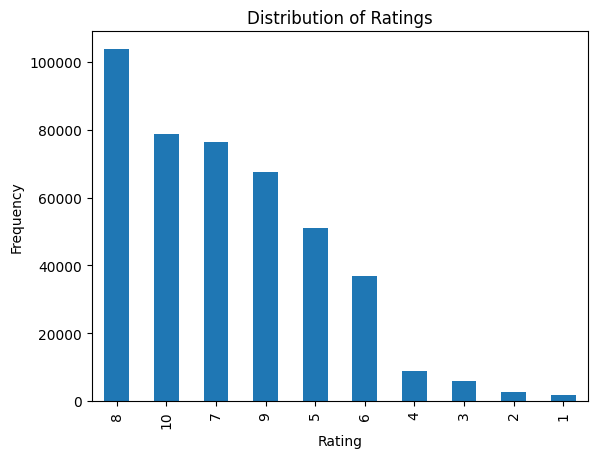

In [75]:
import matplotlib.pyplot as plt
filtered_ratings = ratings[ratings['Book-Rating'] != 0]
filtered_ratings['Book-Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

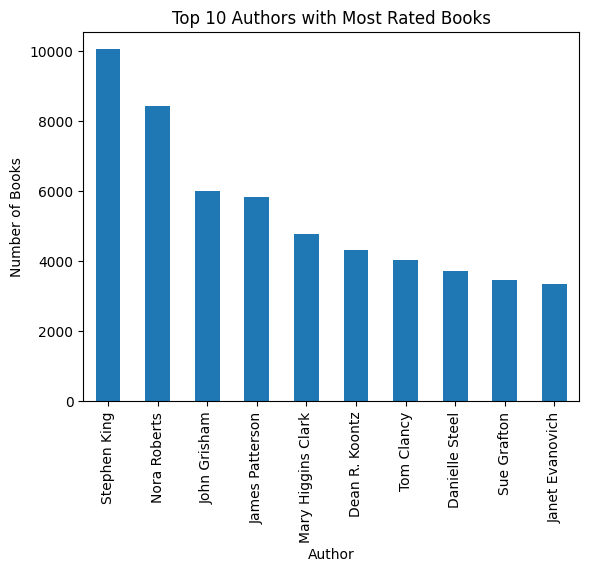

In [ ]:
ratings_with_authors = ratings.merge(books[['ISBN', 'Book-Author']], on='ISBN', how='left')

author_book_count = ratings_with_authors['Book-Author'].value_counts().reset_index(name='num_books')
author_book_count.columns = ['Author', 'Number of Books']

author_book_count.head(10).plot(kind='bar', x='Author', y='Number of Books', legend=False)
plt.title('Top 10 Authors with Most Rated Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()


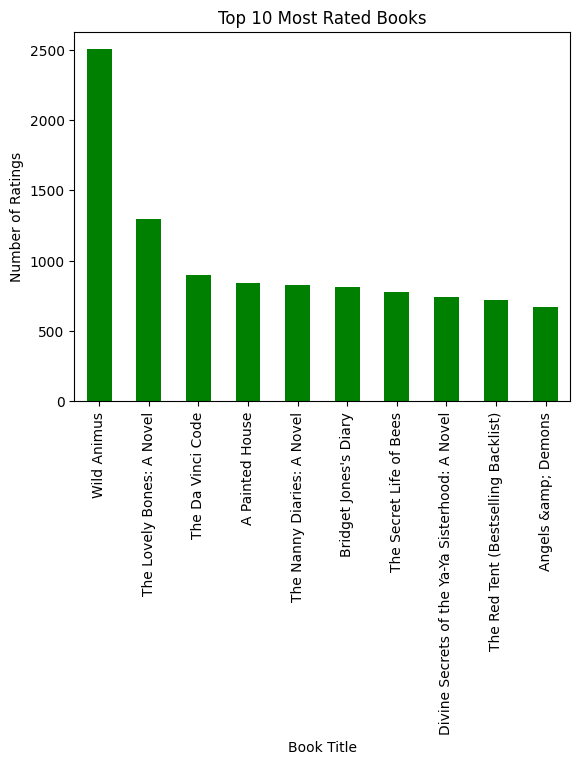

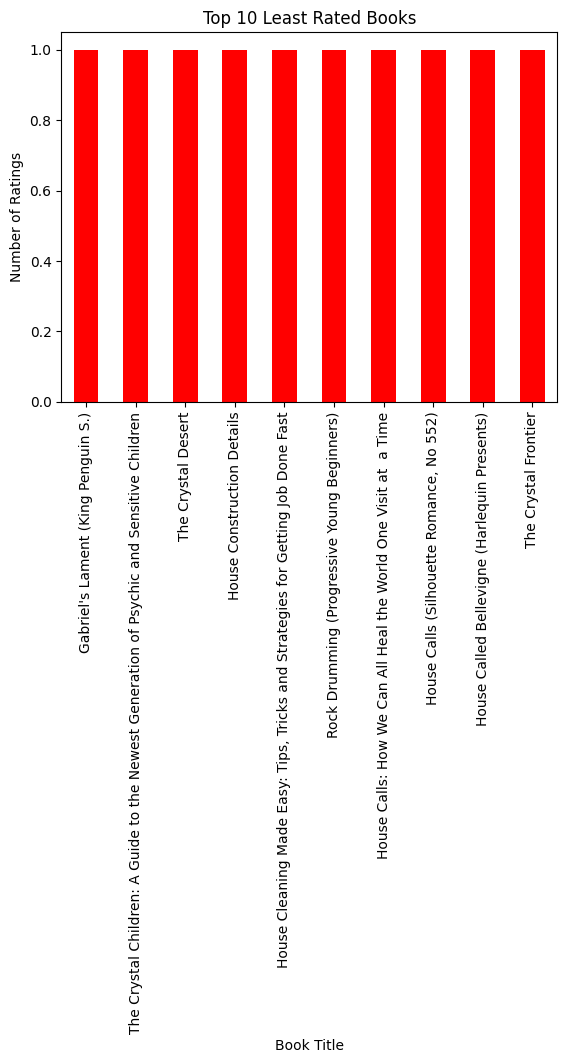

In [ ]:
ratings_with_titles = ratings.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')

book_ratings_count = ratings_with_titles.groupby('Book-Title').size().reset_index(name='num_ratings')

most_rated_books = book_ratings_count.sort_values(by='num_ratings', ascending=False).head(10)
least_rated_books = book_ratings_count.sort_values(by='num_ratings').head(10)

most_rated_books.plot(kind='bar', x='Book-Title', y='num_ratings', legend=False, color='green')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

least_rated_books.plot(kind='bar', x='Book-Title', y='num_ratings', legend=False, color='red')
plt.title('Top 10 Least Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()


## Popularity Based Recommender System

In [7]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [8]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [9]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [10]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [11]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [12]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [13]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

## Collaborative Filtering Based Recommender System

In [14]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [15]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [16]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [17]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [18]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [19]:
pt.fillna(0,inplace=True)

In [20]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(pt)

NearestNeighbors(algorithm='brute', metric='cosine')

In [24]:
def recommend_knn(book_name, n_recommendations=5):
    if book_name not in pt.index:
        print("Book not found in pivot table.")
        return []

    distances, indices = model.kneighbors(pt.loc[[book_name]], n_neighbors=n_recommendations+1)

    data = []

    for i in range(1, len(indices[0])):  # Skip the first, it's the book itself
        index = indices[0][i]
        similarity_score = 1 - distances[0][i]

        # Get book metadata
        similar_book_title = pt.index[index]
        temp_df = books[books['Book-Title'] == similar_book_title]

        # Safely get author and image (some entries may be missing)
        author = temp_df['Book-Author'].dropna().values[0] if not temp_df['Book-Author'].dropna().empty else 'Unknown'
        image_url = temp_df['Image-URL-M'].dropna().values[0] if not temp_df['Image-URL-M'].dropna().empty else ''

        data.append([similar_book_title, author, image_url, round(similarity_score, 4)])

    return data


In [25]:
recommend_knn('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg',
  0.2703],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg',
  0.264],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg',
  0.2367],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg',
  0.233],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg',
  0.2263]]

In [33]:
import pickle

# Only if you use this in your frontend
pickle.dump(popular_df, open('popular.pkl', 'wb'))  

# Required for recommendation logic
pickle.dump(pt, open('pt.pkl', 'wb'))               # Pivot table
pickle.dump(books, open('books.pkl', 'wb'))         # Books metadata
pickle.dump(model, open('knn_model.pkl', 'wb'))     # Trained KNN model


Calculating metrics, this may take some time...
Collected 1000 actual ratings and 1000 predicted ratings.
RMSE: 3.2508
MAE: 2.0441
Precision: 0.6273
Recall: 0.3333
F1-score: 0.4353
Precision: 0.6273
Recall: 0.3333
F1-score: 0.4353


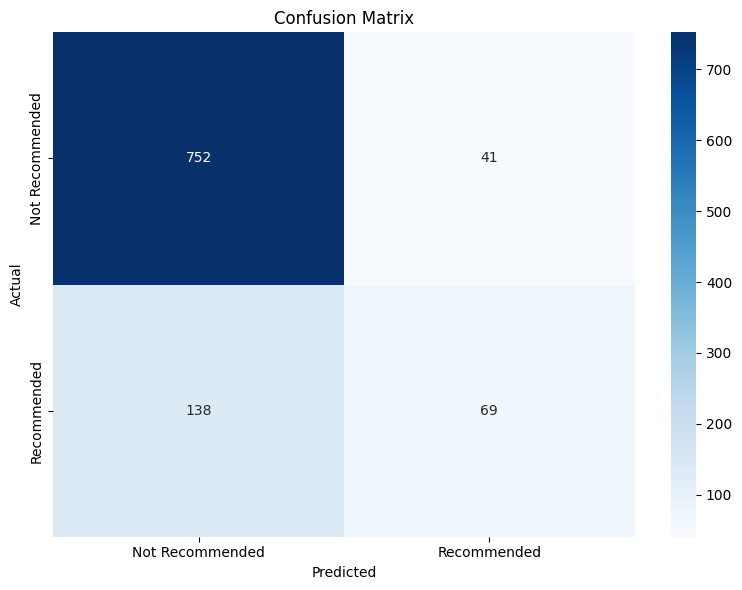

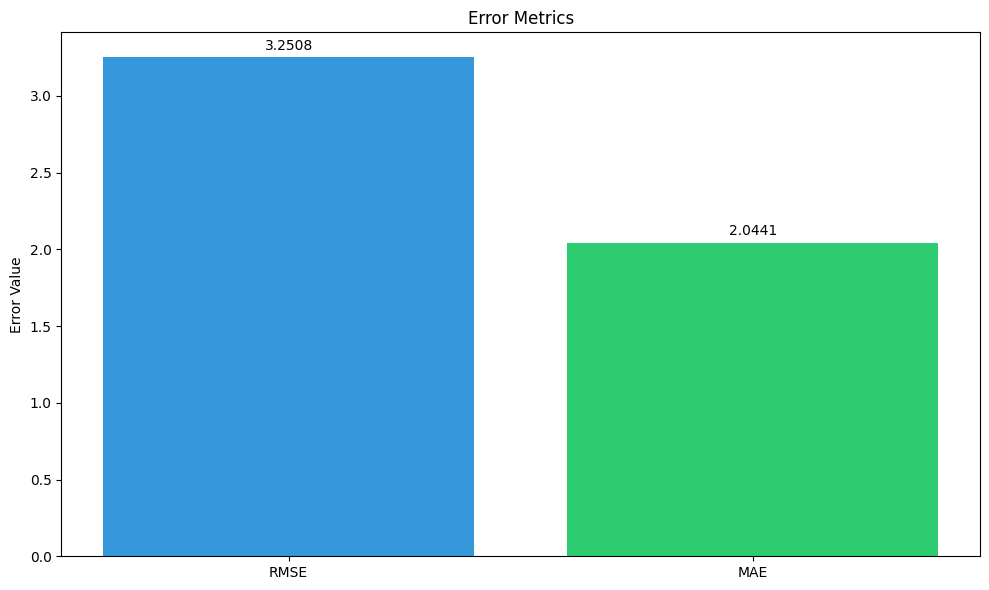

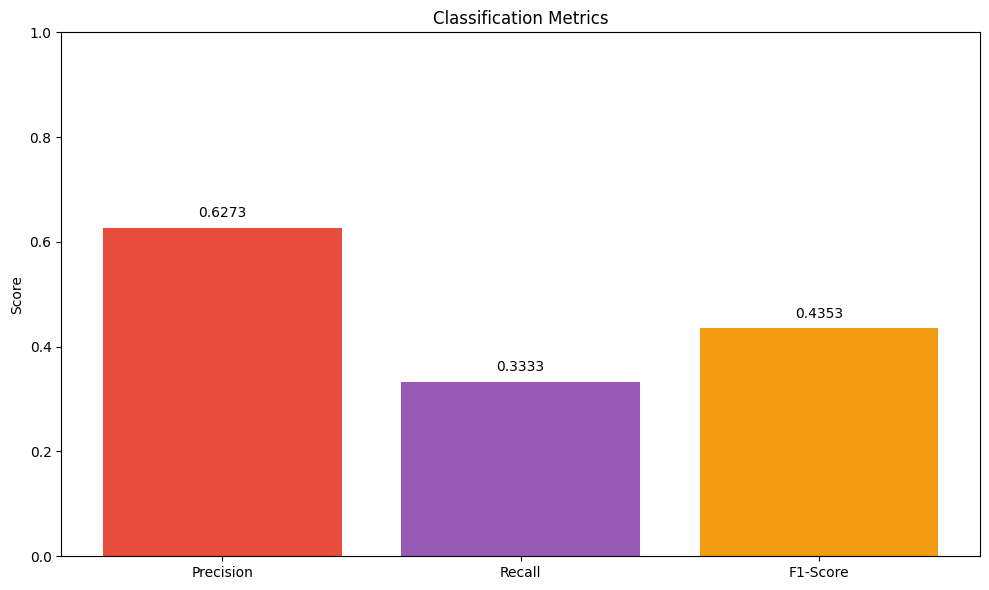

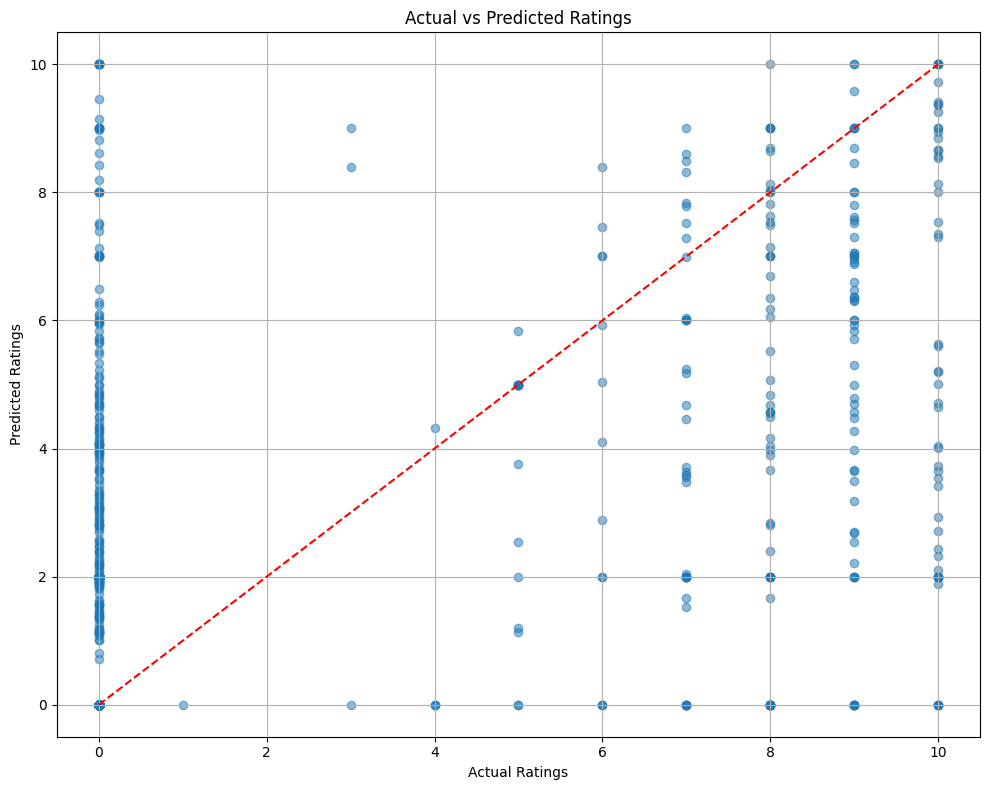

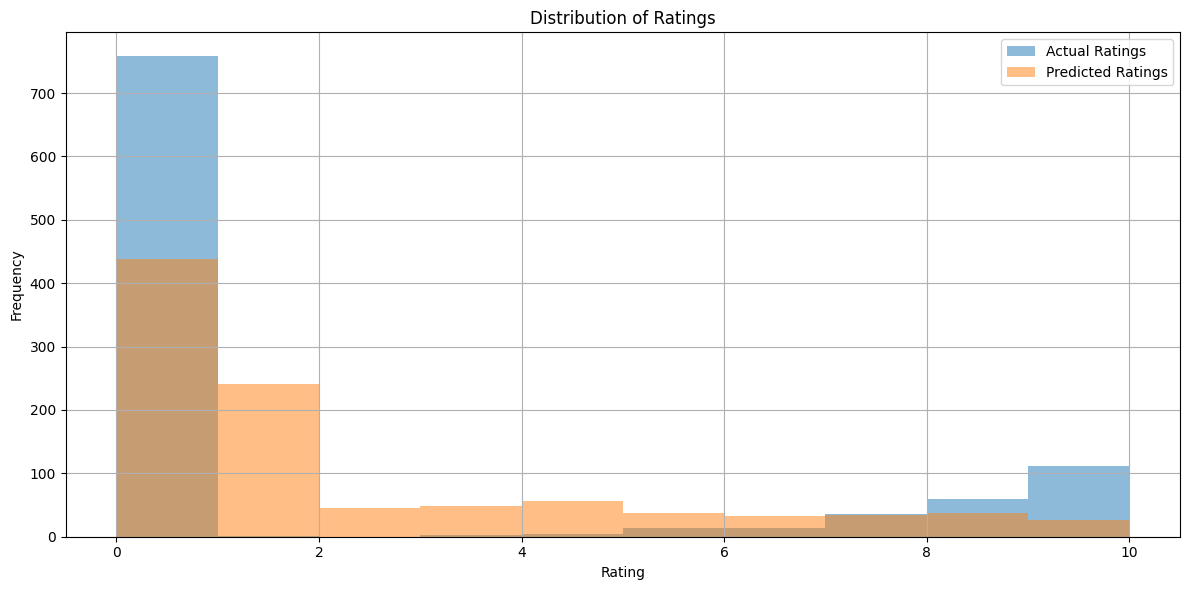

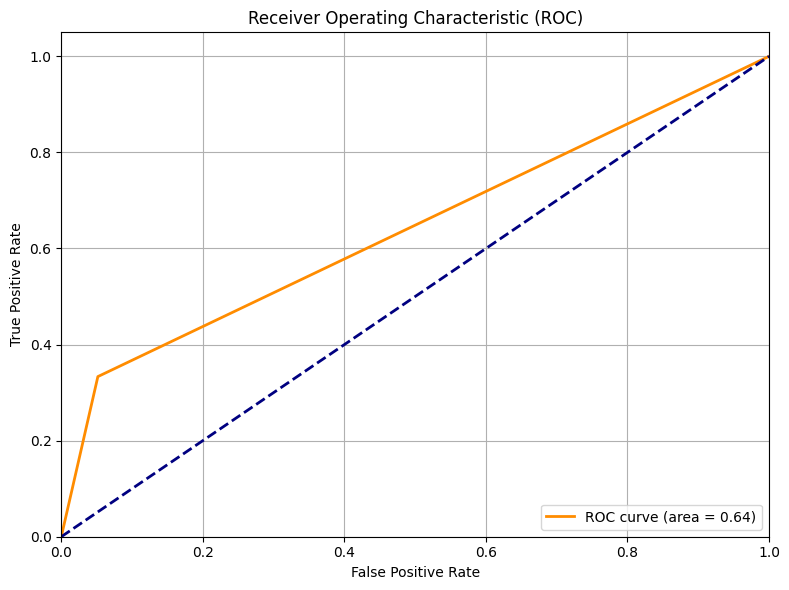

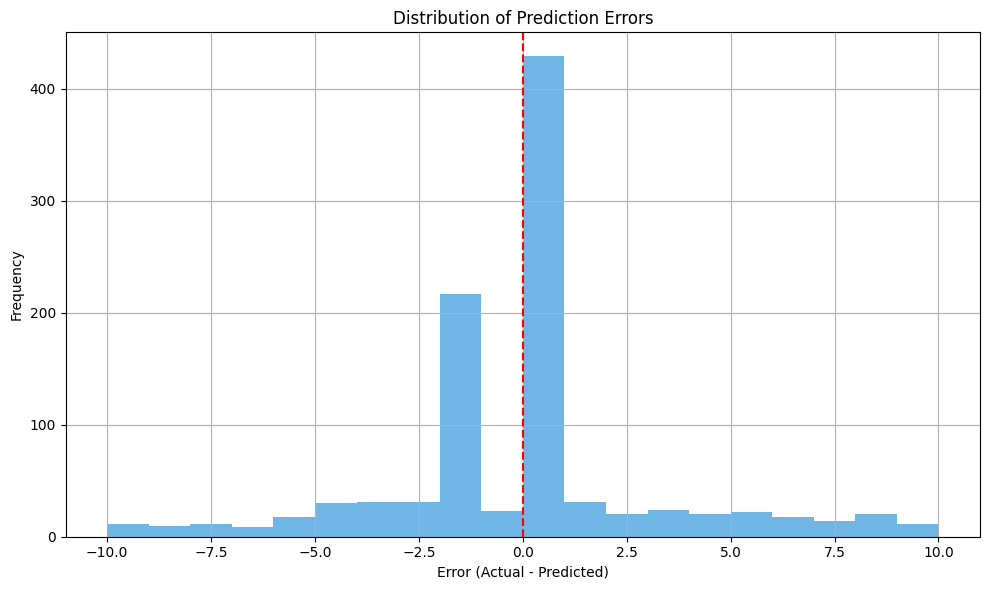


Summary of Evaluation Metrics:
   Metric    Value
     RMSE 3.250788
      MAE 2.044081
Precision 0.627273
   Recall 0.333333
 F1-Score 0.435331
  ROC AUC 0.640815


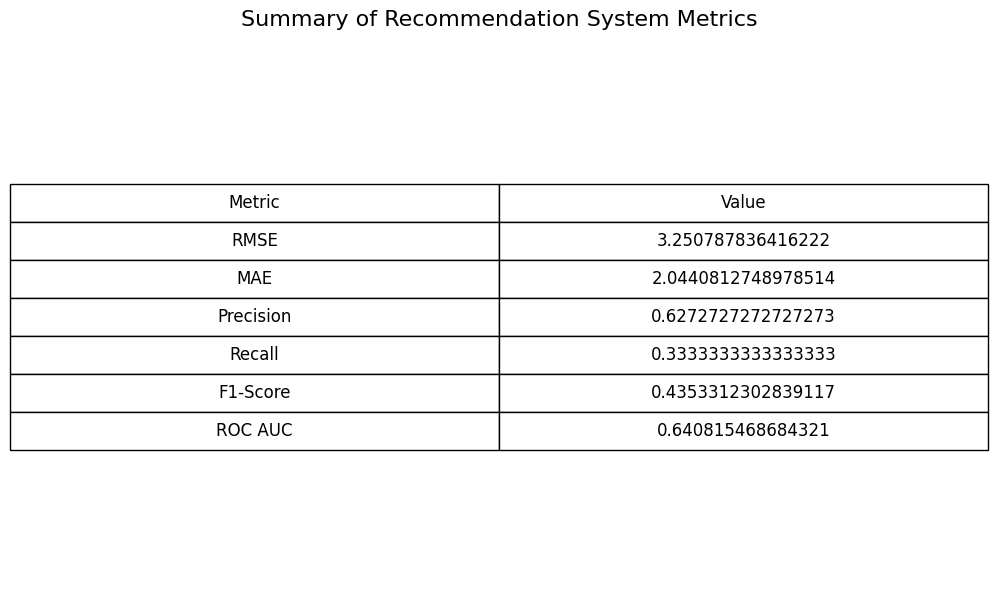

In [26]:
# Evaluation & Results Metrics for your Book Recommendation System
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
 
# Split the data for testing
# Use a hold-out set from final_ratings for evaluation
test_size = 0.2
test_data = final_ratings.sample(frac=test_size, random_state=42)
train_data = final_ratings.drop(test_data.index)
 
# Function to predict ratings using your existing KNN model
def predict_rating(user_id, book_title):
    """Predict rating for a book by a user based on similar books"""
    # Get book recommendations using your existing function
    similar_books = recommend_knn(book_title, n_recommendations=10)
    if not similar_books:  # Book not found or no recommendations
        return final_ratings['Book-Rating'].mean()
    # Get user's ratings for similar books
    user_ratings = []
    similarities = []
    for book_info in similar_books:
        similar_book_title = book_info[0]  # Book title is first element in your recommendation
        similarity = book_info[3]  # Similarity score is fourth element
        # Check if user has rated this similar book
        ratings_by_user = final_ratings[(final_ratings['User-ID'] == user_id) & 
                                        (final_ratings['Book-Title'] == similar_book_title)]
        if not ratings_by_user.empty:
            user_ratings.append(ratings_by_user['Book-Rating'].values[0])
            similarities.append(similarity)
    # If user hasn't rated any of the similar books
    if not user_ratings:
        return final_ratings['Book-Rating'].mean()
    # Calculate weighted average of ratings based on similarity
    return np.average(user_ratings, weights=similarities)
 
# Evaluate on test data
# Evaluate on test data
print("Calculating metrics, this may take some time...")
actual_ratings = []
predicted_ratings = []

# To speed up evaluation, sample from test data if it's large
eval_sample = test_data.sample(min(1000, len(test_data)), random_state=42)

for _, row in eval_sample.iterrows():
    user_id = row['User-ID']
    book_title = row['Book-Title']
    actual_rating = row['Book-Rating']
    # Get prediction
    try:
        pred_rating = predict_rating(user_id, book_title)
        # Store actual and predicted ratings
        actual_ratings.append(actual_rating)
        predicted_ratings.append(pred_rating)
    except Exception as e:
        # Skip problematic predictions
        print(f"Skipping row: {row['User-ID']}, {row['Book-Title']} - Error: {e}")
        continue

# Check if we collected any ratings
print(f"Collected {len(actual_ratings)} actual ratings and {len(predicted_ratings)} predicted ratings.")

# Ensure there are ratings to compute metrics
if len(actual_ratings) > 0 and len(predicted_ratings) > 0:
    # Calculate error metrics
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    mae = mean_absolute_error(actual_ratings, predicted_ratings)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    # Calculate classification metrics
    threshold = 7
    y_true = [1 if rating >= threshold else 0 for rating in actual_ratings]
    y_pred = [1 if rating >= threshold else 0 for rating in predicted_ratings]

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Visualizations
    # (Include the same visualization code here)

else:
    print("No valid ratings were collected for evaluation.")

 
# Calculate classification metrics
# Define threshold for "liked" books (adjust based on your rating scale)
threshold = 7
y_true = [1 if rating >= threshold else 0 for rating in actual_ratings]
y_pred = [1 if rating >= threshold else 0 for rating in predicted_ratings]
 
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
cm = confusion_matrix(y_true, y_pred)
 
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
 
# VISUALIZATIONS
 
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Recommended', 'Recommended'],
            yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
 
# 2. Error Metrics Bar Chart
plt.figure(figsize=(10, 6))
error_metrics = ['RMSE', 'MAE']
error_values = [rmse, mae]
plt.bar(error_metrics, error_values, color=['#3498db', '#2ecc71'])
plt.ylabel('Error Value')
plt.title('Error Metrics')
for i, v in enumerate(error_values):
    plt.text(i, v + 0.05, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()
 
# 3. Classification Metrics Bar Chart
plt.figure(figsize=(10, 6))
class_metrics = ['Precision', 'Recall', 'F1-Score']
class_values = [precision, recall, f1]
plt.bar(class_metrics, class_values, color=['#e74c3c', '#9b59b6', '#f39c12'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Classification Metrics')
for i, v in enumerate(class_values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()
 
# 4. Actual vs Predicted Ratings Scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(actual_ratings, predicted_ratings, alpha=0.5)
plt.plot([min(actual_ratings), max(actual_ratings)], 
         [min(actual_ratings), max(actual_ratings)], 'r--')  # Diagonal line for perfect predictions
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()
 
# 5. Distribution of Actual vs Predicted Ratings
plt.figure(figsize=(12, 6))
plt.hist(actual_ratings, bins=10, alpha=0.5, label='Actual Ratings')
plt.hist(predicted_ratings, bins=10, alpha=0.5, label='Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
 
# 6. ROC Curve
from sklearn.metrics import roc_curve, auc
 
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
 
# 7. Error Distribution
errors = np.array(actual_ratings) - np.array(predicted_ratings)
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='#3498db', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.tight_layout()
plt.show()
 
# 8. Summary Table of Metrics
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Value': [rmse, mae, precision, recall, f1, roc_auc]
})
 
print("\nSummary of Evaluation Metrics:")
print(metrics_df.to_string(index=False))
 
# Visual table of metrics
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
 
table = plt.table(
    cellText=metrics_df.values,
    colLabels=metrics_df.columns,
    loc='center',
    cellLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)
plt.title('Summary of Recommendation System Metrics', fontsize=16, pad=20)
plt.tight_layout()
plt.show()